<font size="6"><b>Cosmologia con Conteggi di Ammassi di Galassie - Daniele Gloazzo<b><font>

<font size="5"><b>Introduzione e Scopo<b><font>

L'obiettivo di questo lavoro è la verifica dell'analisi di un campione di dati sui campi di ammassi di galassie con caratteristiche simili a quelle osservate dalla missione Euclid, un progetto dell'ESA finalizzato alla mappatura della geometria dell’Universo oscuro. In particolare, il nostro lavoro si concentra sulla verifica della conformità dei dati osservativi alla distribuzione teoricamente prevista per tali strutture cosmiche.

Attraverso questa analisi, stimiamo i parametri cosmologici $\sigma_8$, $\Omega_m$ e $\Omega_{\Lambda}$ in diversi scenari, considerando sia un universo piatto che un universo curvo, e valutiamo la loro dipendenza dal redshift.

<font size="5"><b>Parte 1 - Visualizzazione e Analisi dei Dati<b><font>

In questa prima parte si andrà ad utilizzare la libreria Python *Pandas* per visualizzare i dati contenuti nel file *Euclid_ammassi.csv*.

In [1]:
import pandas as pd

data = pd.read_csv("Euclid_ammassi.csv")
data

,Unnamed: 0,mass,z,vol
0,0,1.060613e+14,0.506,1.479387e+10
1,1,1.097076e+14,0.506,1.479387e+10
2,2,1.588869e+14,0.506,1.479387e+10
3,3,1.336345e+14,0.506,1.479387e+10
4,4,3.078288e+14,0.506,1.479387e+10
...,...,...,...,...
362632,362632,1.002043e+14,1.500,9.112247e+10
362633,362633,1.267961e+14,1.500,9.112247e+10
362634,362634,1.273208e+14,1.500,9.112247e+10
362635,362635,1.093178e+14,1.500,9.112247e+10


In [2]:
data.groupby('z').aggregate({'vol': ['min','max'], 'mass': ['count', 'mean', 'min','max']})

vol                  mass                              \
                min           max   count          mean           min   
z                                                                       
0.506  1.479387e+10  1.479387e+10  168897  1.754502e+14  1.000004e+14   
1.019  4.783826e+10  4.783826e+10  142007  1.520161e+14  1.000036e+14   
1.500  9.112247e+10  9.112247e+10   51733  1.370772e+14  1.000017e+14   

                     
                max  
z                    
0.506  2.231156e+15  
1.019  1.536768e+15  
1.500  9.605430e+14

Si osserva che gli ammassi di galassie considerati sono suddivisi in tre intervalli di redshift, i quali costituiranno la base dell'analisi successiva volta a investigare la dipendenza dei parametri cosmologici $\sigma_8$, $\Omega_m$ e $\Omega_{\Lambda}$.

In [3]:
data.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


In [86]:
data.groupby('vol').aggregate({'z': ['min','max'], 'mass': ['count', 'mean', 'min','max']})

z           mass                                          
                min    max   count          mean           min           max
vol                                                                         
1.479387e+10  0.506  0.506  168897  1.754502e+14  1.000004e+14  2.231156e+15
4.783826e+10  1.019  1.019  142007  1.520161e+14  1.000036e+14  1.536768e+15
9.112247e+10  1.500  1.500   51733  1.370772e+14  1.000017e+14  9.605430e+14

Allo stesso modo dei bin di redshift si osserva che anche i volumi sono suddivisi in tre intervalli, ognuno corrispondente ad un redshift specifico.

In [4]:
data.groupby('vol')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
vol,,,,,,,,
1.479387e+10,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
4.783826e+10,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
9.112247e+10,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


Adesso si andrà ad analizzare la dipendenza del numero di Ammassi dalla massa e dal redshift.

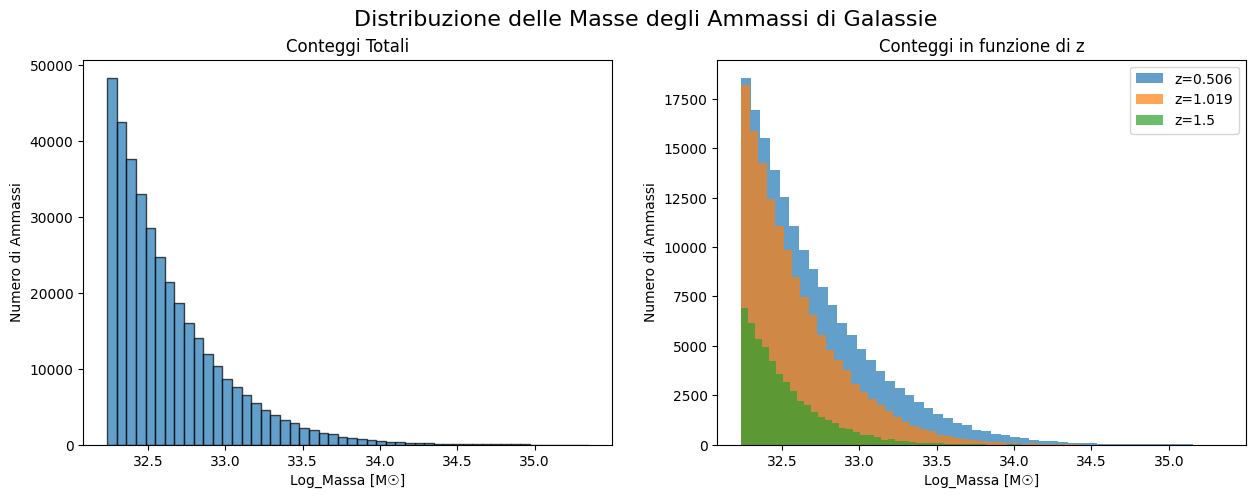

In [94]:
import numpy as np
import matplotlib.pyplot as plt

nbin = 50
z_bins = data['z'].unique() #creo una lista di redshift con ogni valore diverso

#creazione degli istogrammi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log(data['mass']), bins=nbin, alpha=0.7, edgecolor='black', label='Total')
axes[0].set_xlabel('Log_Massa [M☉]')
axes[0].set_ylabel('Numero di Ammassi')
axes[0].set_title('Conteggi Totali')

for z in z_bins:
    axes[1].hist(np.log(data[data['z'] == z]['mass']), bins=nbin, alpha=0.7, label=f'z={z}')

axes[1].set_xlabel('Log_Massa [M☉]')
axes[1].set_ylabel('Numero di Ammassi')
axes[1].set_title('Conteggi in funzione di z')
axes[1].legend()
fig.suptitle('Distribuzione delle Masse degli Ammassi di Galassie', fontsize=16)
plt.show()

Dall'analisi dei grafici possiamo dedurre che:
- La relazione inversa tra la massa dell'ammasso e la densità di ammassi nel campione esaminato suggerisce che all'aumentare della massa dell'ammasso, il numero totale di ammassi osservati diminuisce.
- Un andamento simile emerge anche con il redshift: all'aumentare del redshift, il numero di ammassi osservati decresce.

<font size="5"><b>Parte 2 - Analisi della Halo Mass Function (HMF)<b><font>

In questa sezione verrà analizzato se la distribuzione osservata del numero di ammassi segue l’andamento previsto dal modello teorico. I valori teorici vengono ottenuti mediante una funzione specifica della libreria Python *Colossus*, che calcola la distribuzione prevista a partire da parametri cosmologici assegnati e in funzione del redshift.  

L'analisi verrà condotta separatamente per ciascun intervallo di redshift, al fine di confrontare i dati osservativi con le previsioni del modello teorico. Qualora il modello si dimostrasse attendibile e in accordo con le osservazioni, sarà possibile utilizzarlo per stimare alcuni parametri cosmologici che, nella fase attuale, vengono assegnati manualmente.

Per ora si assume un universo <b>piatto<b>.

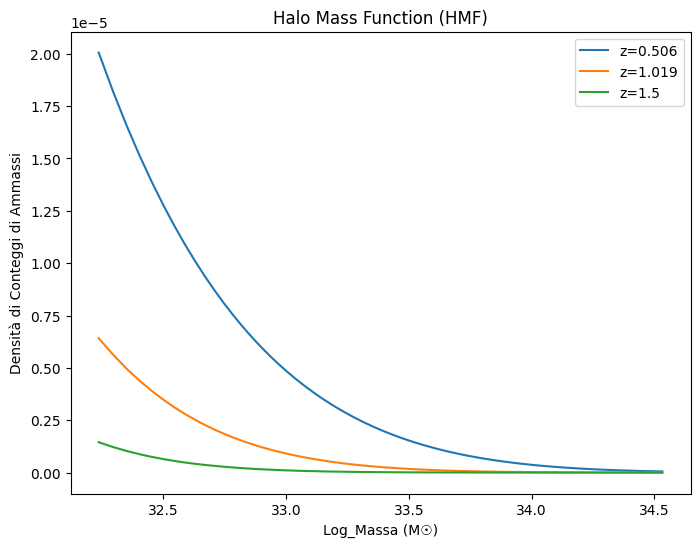

In [93]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

mass_bins = np.linspace(1e+14, 1e+15, 150) #consideriamo un intervallo di masse tra 10^14 a 10^15

#HMF
params = {'flat': True, 'H0': 67.77, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.96}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

plt.figure(figsize=(8,6))
for z in z_bins:
    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    mfunc = mass_function.massFunction(mass_bins[:-1], z, mdef='vir', model='despali16', q_out='dndlnM')
    
    plt.plot(np.log(mass_bins[:-1]), mfunc, label=f'z={z}')
    
plt.xlabel('Log_Massa (M☉)')
plt.ylabel('Densità di Conteggi di Ammassi')
plt.title('Halo Mass Function (HMF)')
plt.legend()
plt.show()

Il risultato ottenuto rappresenta la densità di conteggio degli ammassi di galassie in funzione della massa. Tuttavia, per effettuare un confronto diretto tra i valori osservati e quelli previsti dal modello teorico, l'analisi verrà condotta considerando il conteggio assoluto degli ammassi, piuttosto che la loro densità.

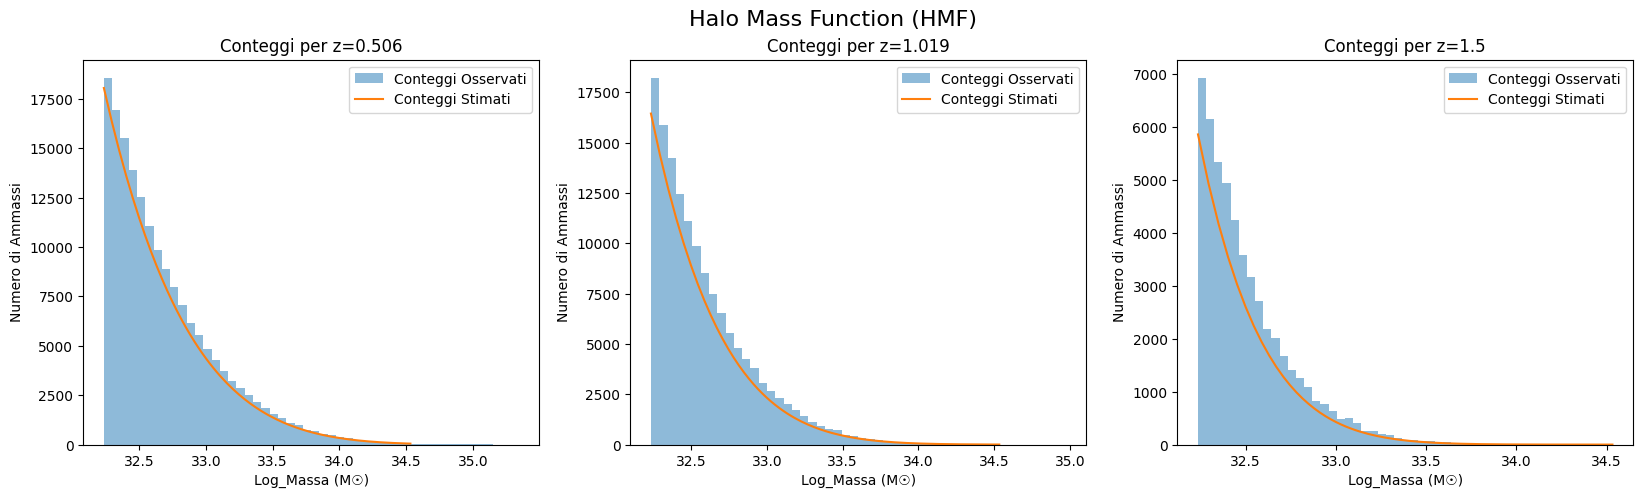

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#HMF
i=0
for z in z_bins:
    params = {'flat': True, 'H0': 67.77, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')

    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    volumes = data[data['z'] == z]['vol'].values[0]
    log_mass = (np.log(bins_center.max()) - np.log(bins_center.min())) / nbin 
    mfunc = mass_function.massFunction(mass_bins[:-1], z, mdef='vir', model='despali16', q_out='dndlnM') * volumes * log_mass
    
    axes[i].hist(np.log(data[data['z'] == z]['mass']), bins=nbin, alpha=0.5, label='Conteggi Osservati')
    axes[i].plot(np.log(mass_bins[:-1]), mfunc, label='Conteggi Stimati')
    axes[i].set_xlabel('Log_Massa (M☉)')
    axes[i].set_ylabel('Numero di Ammassi')
    axes[i].set_title(f'Conteggi per z={z}')
    axes[i].legend()
    
    i = i+1

fig.suptitle('Halo Mass Function (HMF)', fontsize=16)
plt.show()

Dall'analisi dei grafici emerge che i valori osservati seguono con buona approssimazione l'andamento previsto dal modello teorico. Tuttavia, si osserva sistematicamente una lieve sottostima da parte del modello rispetto ai dati osservativi in tutti i grafici analizzati.

<font size="5"><b>Parte 3 I - Inferenza Bayesiana sui parametri cosmologici<b><font>

Poiché la stima teorica risulta leggermente sottostimata rispetto ai dati osservativi, in questa sezione si procederà alla correzione della stima attraverso l’ottimizzazione dei parametri cosmologici $\sigma_8$ e $\Omega_m$.

Per ottenere una stima ottimale di questi parametri, si utilizzerà l’algoritmo emcee, un campionatore Markov Chain Monte Carlo (MCMC) basato sull'algoritmo di affine-invariant ensemble sampling. Nel caso specifico di un universo piatto, il prior sui parametri sarà limitato all’intervallo [0.1,1.1].

Si assume inoltre che il numero di ammassi osservato in ciascun bin di massa segua una distribuzione di Poisson attorno al valore teorico previsto dalla Halo Mass Function (HMF).

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [17:16<00:00,  1.04s/it]


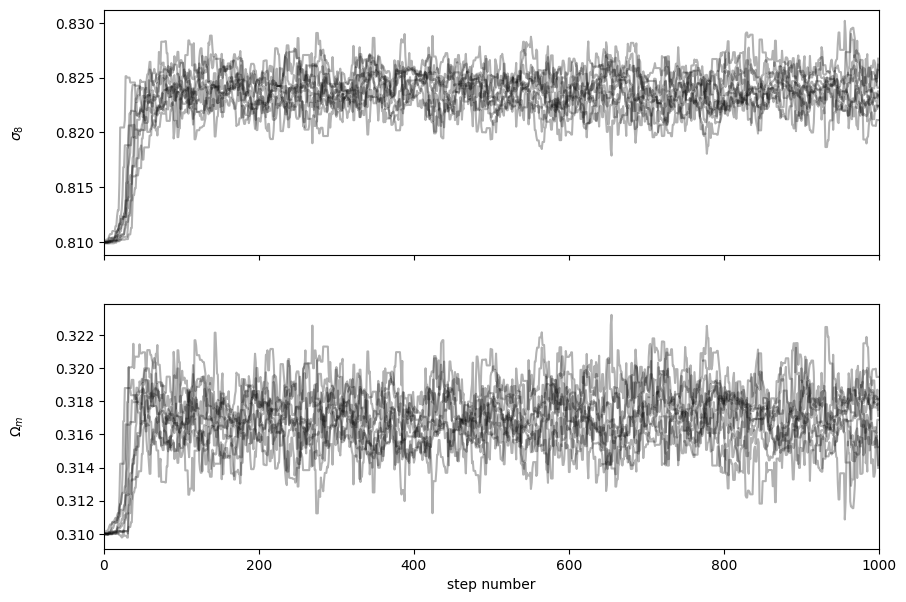

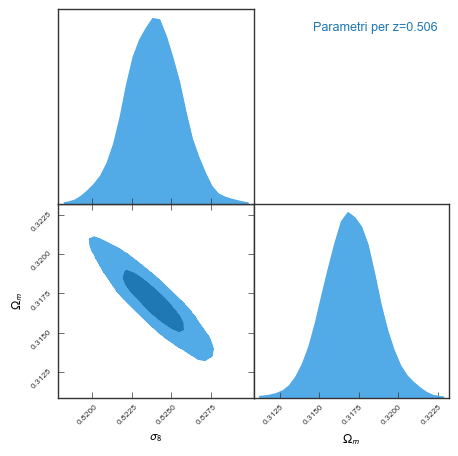

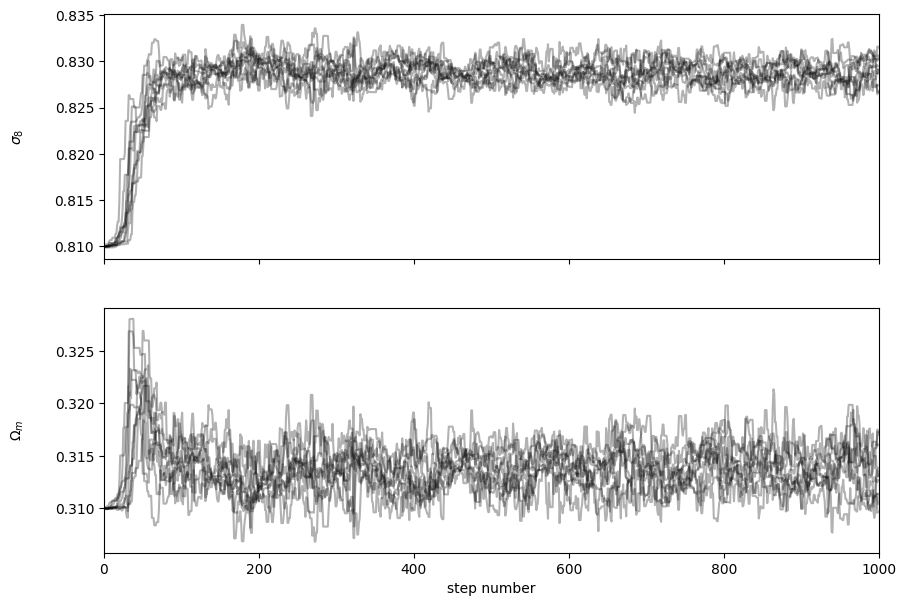

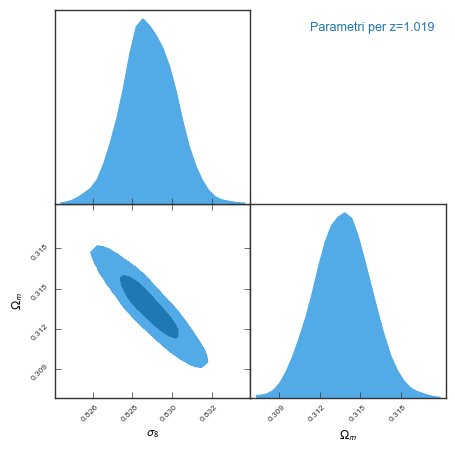

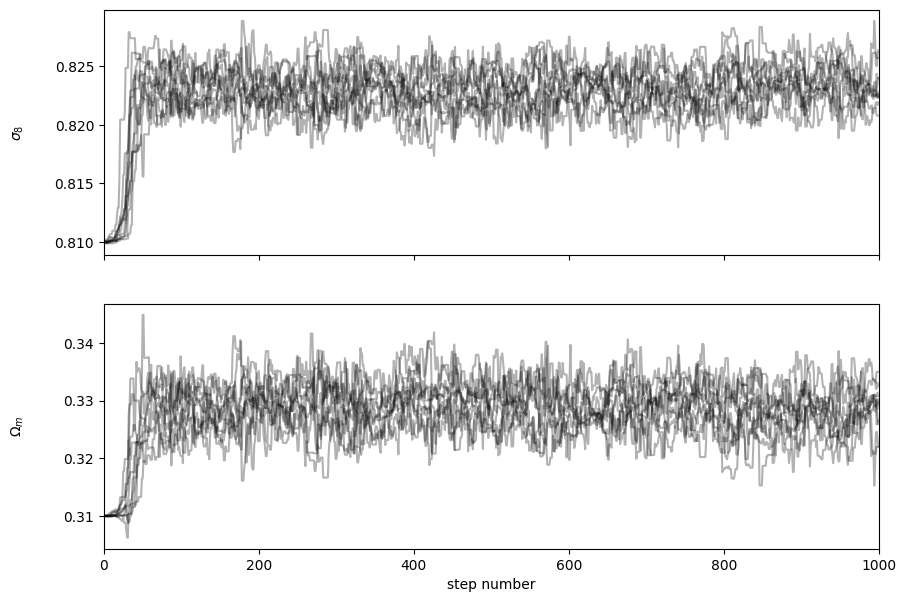

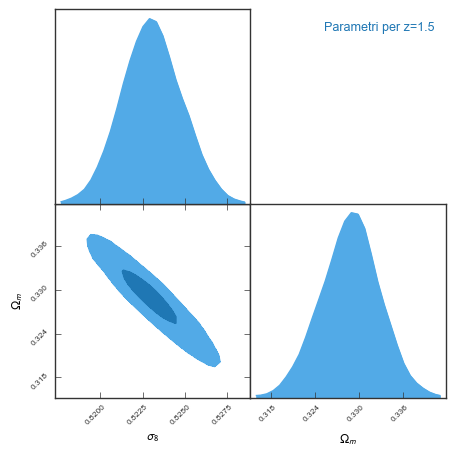

In [104]:
import scipy.stats as stats
from scipy.optimize import minimize
import pygtc
import emcee

def log_prior(theta):
    sigma8, Om0 = theta
    if 0.1 < sigma8 < 1.1 and 0.1 < Om0 < 1.1:
        return 0.0  # Prior uniforme
    return -np.inf

def log_likelihood(theta, observed_counts, bins_center, volumes, log_mass, z):
    sigma8, Om0 = theta
    params = {'flat': True, 'H0': 67.77, 'Om0': Om0, 'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(bins_center, z, mdef='vir', model='despali16', q_out='dndlnM') * volumes * log_mass
    return np.nansum(stats.poisson.logpmf(observed_counts, mfunc))

def log_posterior(theta, observed_counts, bins_center, volumes, log_mass, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, observed_counts, bins_center, volumes, log_mass, z)

sigma8 = 0.81
Om0 = 0.31

dati = []
for z in z_bins:
    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    volumes = data[data['z'] == z]['vol'].values[0]
    log_mass = (np.log(bins_center.max()) - np.log(bins_center.min())) / nbin
    
    args = (observed_counts, bins_center, volumes, log_mass, z)
    
    np.random.seed(45)
    nll = lambda *args: -log_posterior(*args)
    initial = np.array([sigma8, Om0])
    
    pos = initial*(1+ 1e-4 * np.random.randn(10, 2))
    nwalkers, ndim = pos.shape
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=args)
    sampler.run_mcmc(pos, 1000,progress=True);
    
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["$\sigma_{8}$", "$\Omega_{m}$"]
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        
    axes[-1].set_xlabel("step number");
     
    flat_samples = sampler.get_chain(discard=100, flat=True)
    
    dati.append(flat_samples)
    
    GTC = pygtc.plotGTC(chains=flat_samples,
                        paramNames=["$\sigma_{8}$", "$\Omega_{m}$"],
                        chainLabels=[f'Parametri per z={z}'],
                        figureSize='MNRAS_page')

Dall'analisi dei grafici si osserva che le catene MCMC si sviluppano attorno a valori ben definiti senza mostrare segni di divergenza, suggerendo che l'algoritmo *emcee* ha raggiunto la convergenza in modo efficace.  

Una volta ottenuti i parametri cosmologici ottimali, si assume, per la legge dei grandi numeri, che il loro valore stimato sia dato dalla media totale delle iterazioni. A questo punto, si procederà con il confronto tra la nuova stima teorica dei conteggi, ottenuta utilizzando i parametri aggiornati, e i dati osservativi.  

L'obiettivo finale è verificare se l'uso dei parametri ottimizzati permette di ottenere una migliore concordanza tra il modello teorico e le osservazioni, riducendo la discrepanza precedentemente riscontrata.

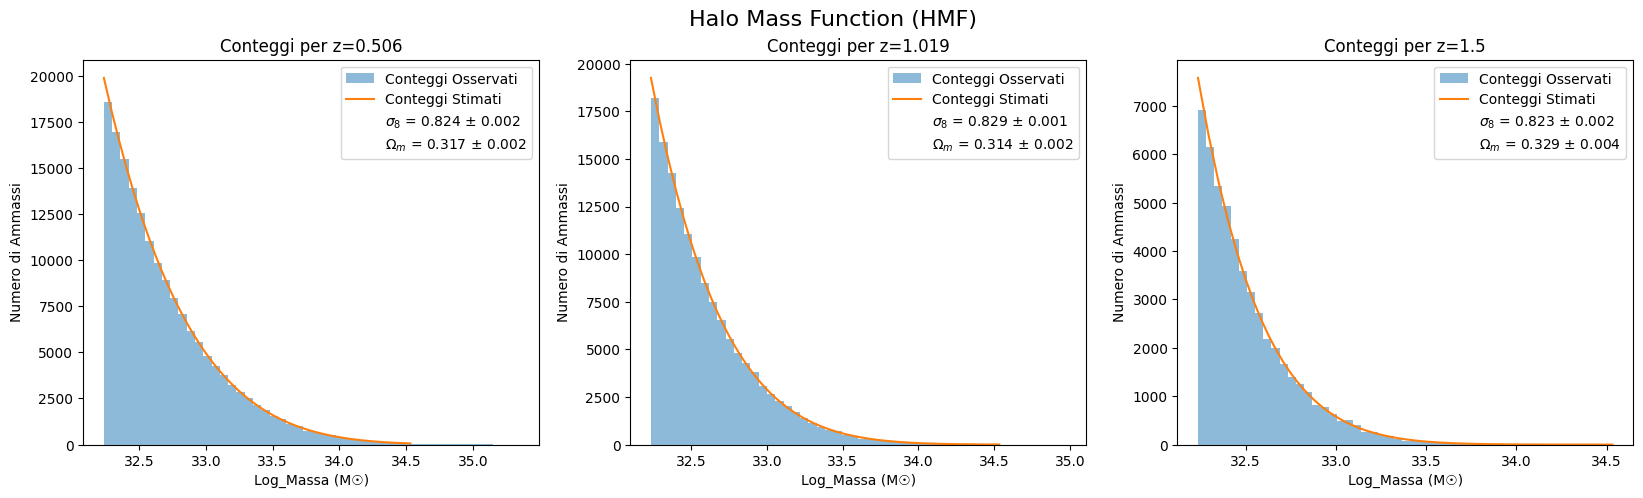

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

mass_bins = np.linspace(1e+14, 1e+15, 150)

i=0
for z in z_bins:
    params = {'flat': True, 'H0': 67.77, 'Om0': np.mean(dati[i][:,1]), 'Ob0': 0.049, 'sigma8': np.mean(dati[i][:,0]), 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')

    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    volumes = data[data['z'] == z]['vol'].values[0]
    log_mass = (np.log(bins_center.max()) - np.log(bins_center.min())) / nbin 
    mfunc = mass_function.massFunction(mass_bins[:-1], z, mdef='vir', model='despali16', q_out='dndlnM') * volumes * log_mass
    
    axes[i].hist(np.log(data[data['z'] == z]['mass']), bins=nbin, alpha=0.5, label='Conteggi Osservati')
    axes[i].plot(np.log(mass_bins[:-1]), mfunc, label='Conteggi Stimati')
    axes[i].plot(np.log(mass_bins[0]), [0], color='none', label=f'$\sigma_{8}$ = {np.mean(dati[i][:,0]):.3f} $\pm$ {np.std(dati[i][:,0]):.3f}')
    axes[i].plot(np.log(mass_bins[0]), [0], color='none', label=f'$\Omega_m$ = {np.mean(dati[i][:,1]):.3f} $\pm$ {np.std(dati[i][:,1]):.3f}')
    axes[i].set_xlabel('Log_Massa (M☉)')
    axes[i].set_ylabel('Numero di Ammassi')
    axes[i].set_title(f'Conteggi per z={z}')
    axes[i].legend()
    
    i = i+1

fig.suptitle('Halo Mass Function (HMF)', fontsize=16)
plt.show()

Dall'analisi dei nuovi risultati si osserva come il modello teorico, ora basato sui parametri ottimizzati, si adatti in modo significativamente più accurato ai dati osservativi. Questo suggerisce che i valori stimati per $\sigma_8$ e $\Omega_m$ rappresentano effettivamente una descrizione più coerente della distribuzione degli ammassi di galassie rispetto alle osservazioni.

La stima dei parametri è stata effettuata separatamente per ciascun intervallo di redshift, ma sarebbe stato possibile eseguire un'analisi congiunta considerando simultaneamente tutti e tre gli intervalli.  

Nel nostro caso, la suddivisione in tre intervalli è stata adottata per studiare la dipendenza dei parametri dal redshift e valutare eventuali variazioni nel modello teorico della *Halo Mass Function* (HMF) in funzione di questo parametro. Tuttavia, un'analisi congiunta avrebbe potuto fornire una stima più accurata dei parametri cosmologici, riducendo l'incertezza statistica e migliorando il confronto tra teoria e osservazioni.  

<font size="5"><b>Parte 3 II - Inferenza Bayesiana sui parametri cosmologici con universo curvo<b><font>

In questa ultima fase, l'analisi verrà estesa al caso di un universo curvo, includendo nella stima il parametro $\Omega_{\Lambda}$, che rappresenta la densità di energia oscura. In questo scenario, la densità di curvatura dell’universo è definita come  
<div style="text-align: center;">
$\Omega_k = 1 - \Omega_m - \Omega_{\Lambda}$
</div>

dove $\Omega_k$ quantifica il contributo della curvatura spaziale.  

L'approccio seguito rimane analogo a quello utilizzato in precedenza, basandosi sull'algoritmo *emcee* per la stima bayesiana dei parametri cosmologici. Tuttavia, in questo caso, il prior per $\Omega_{\Lambda}$ viene assunto come una distribuzione gaussiana con media $\mu = 0.7$ e deviazione standard $\sigma = 0.05$.

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.54it/s]


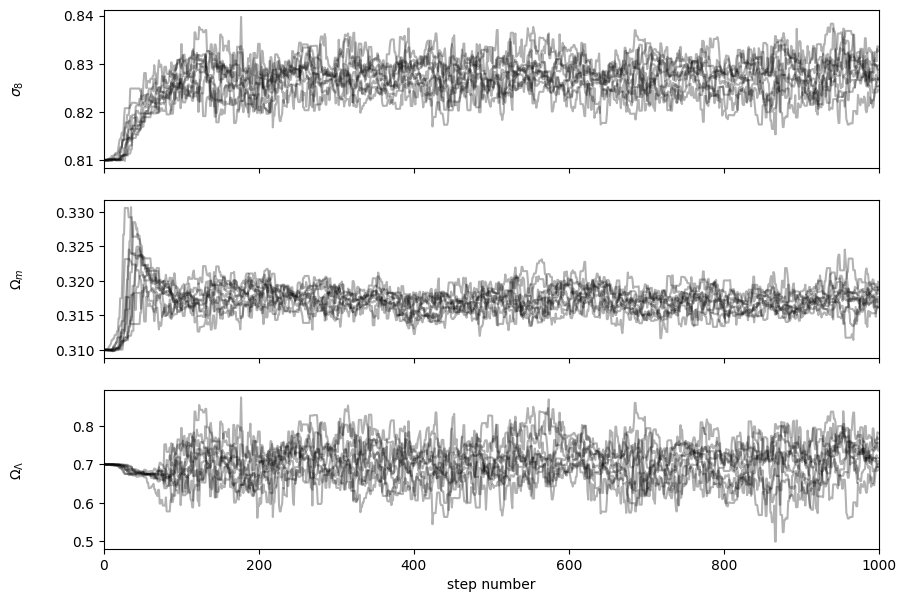

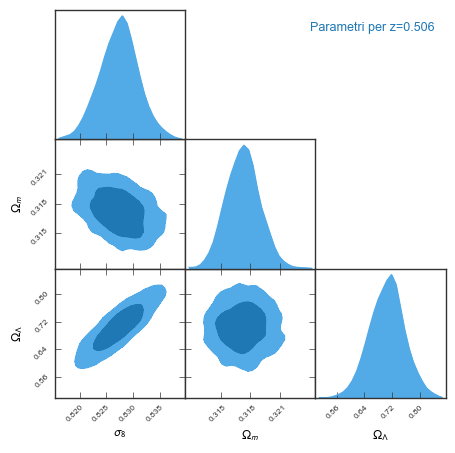

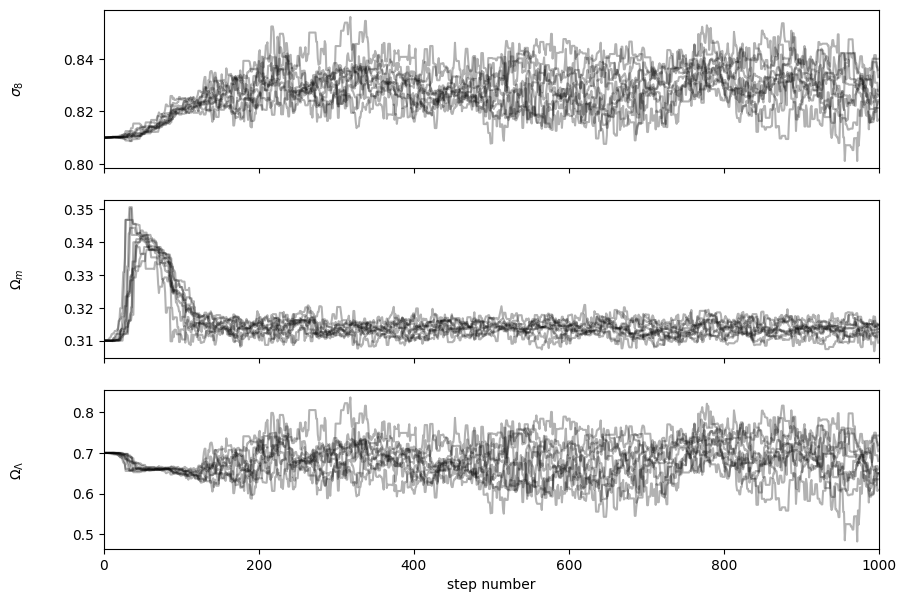

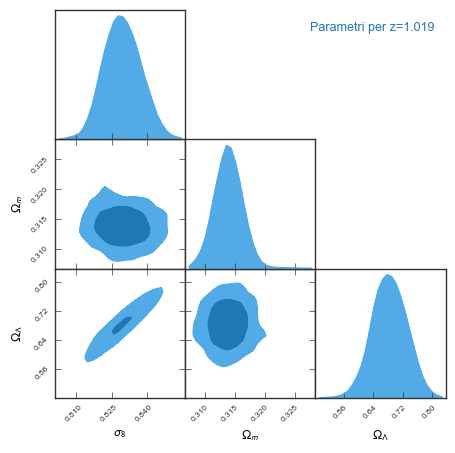

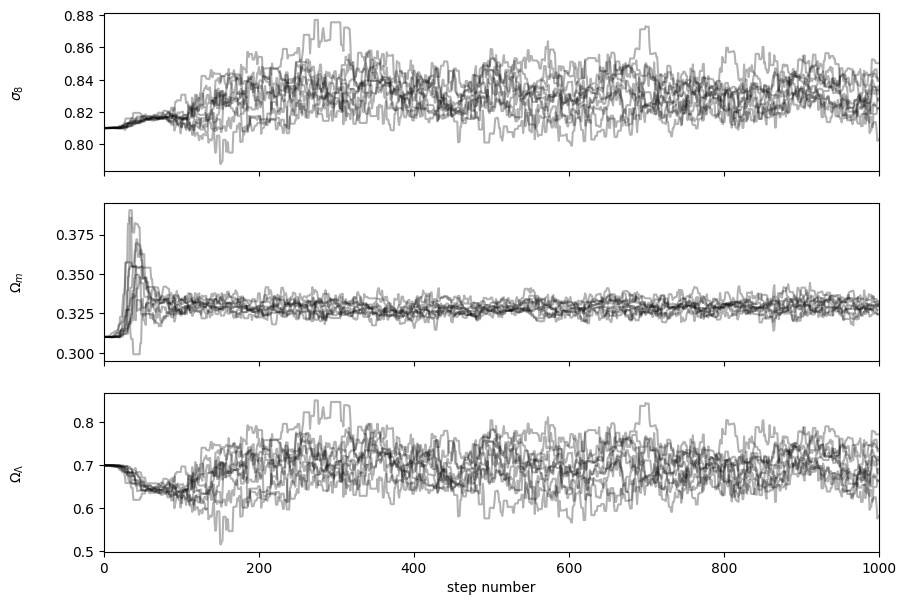

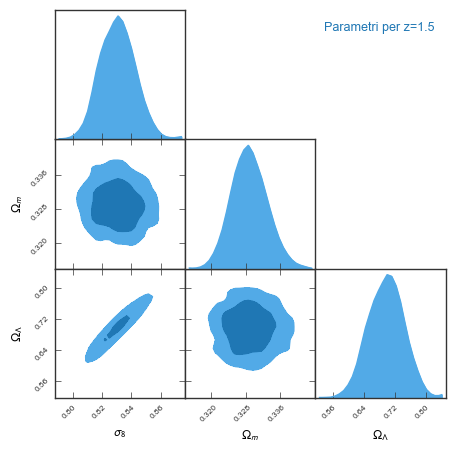

In [107]:
def log_prior(theta):
    sigma8, Om0, Ode0 = theta
    if 0.1 < sigma8 < 1.1 and 0.1 < Om0 < 1.1 and 0.1 < Ode0 < 1.1:
        return stats.norm.logpdf(Ode0, loc=0.7, scale=0.05)
    return -np.inf

def log_likelihood(theta, observed_counts, bins_center, volumes, log_mass, z):
    sigma8, Om0, Ode0 = theta
    params = {'flat': False, 'H0': 67.77, 'Om0': Om0, 'Ode0': Ode0, 'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(bins_center, z, mdef='vir', model='despali16', q_out='dndlnM') * volumes * log_mass
    return np.nansum(stats.poisson.logpmf(observed_counts, mfunc))

def log_posterior(theta, observed_counts, bins_center, volumes, log_mass, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, observed_counts, bins_center, volumes, log_mass, z)

sigma8 = 0.81
Om0 = 0.31
Ode0 = 0.7

dati = []
for z in z_bins:
    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    volumes = data[data['z'] == z]['vol'].values[0]
    log_mass = (np.log(bins_center.max()) - np.log(bins_center.min())) / nbin
    
    args = (observed_counts, bins_center, volumes, log_mass, z)
    
    np.random.seed(45)
    nll = lambda *args: -log_posterior(*args)
    initial = np.array([sigma8, Om0, Ode0])
    
    pos = initial *(1+ 1e-4 * np.random.randn(10, 3))
    nwalkers, ndim = pos.shape
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=args)
    sampler.run_mcmc(pos, 1000,progress=True);
    
    fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["$\sigma_{8}$", "$\Omega_{m}$", "$\Omega_{\Lambda}$ "]
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        
    axes[-1].set_xlabel("step number");
     
    flat_samples = sampler.get_chain(discard=100, flat=True)
    
    dati.append(flat_samples)
    
    GTC = pygtc.plotGTC(chains=flat_samples,
                        paramNames=["$\sigma_{8}$", "$\Omega_{m}$", "$\Omega_{\Lambda}$"],
                        chainLabels=[f'Parametri per z={z}'],
                        figureSize='MNRAS_page')

Anche in questo caso, dai grafici si osserva che le catene MCMC convergono attorno a valori ben definiti senza mostrare segni di divergenza, indicando che la stima ha avuto esito positivo.  

Analogamente all'analisi precedente, confronteremo i risultati ottenuti con i conteggi osservati per verificare la compatibilità tra il modello teorico e i dati. Inoltre, applicando la legge dei grandi numeri, assumeremo il valore stimato di $\Omega_\Lambda$ come la media di tutti i valori ottenuti nelle catene MCMC.

Dall'analisi dei grafici delle distribuzioni congiunte si osserva che i parametri $\Omega_\Lambda$ e $\Omega_m$ non mostrano una correlazione significativa tra loro e possiamo quindi supporli <b> NON </b> correlati.

Si osserva che anche i parametri $\sigma_8$ e $\Omega_m$ non mostrano una correlazione significativa tra loro nel caso di universo curvo, contrariamente a quanto osservato nell'universo piatto, dove i due parametri risultavano essere molto più correlati tra loro.

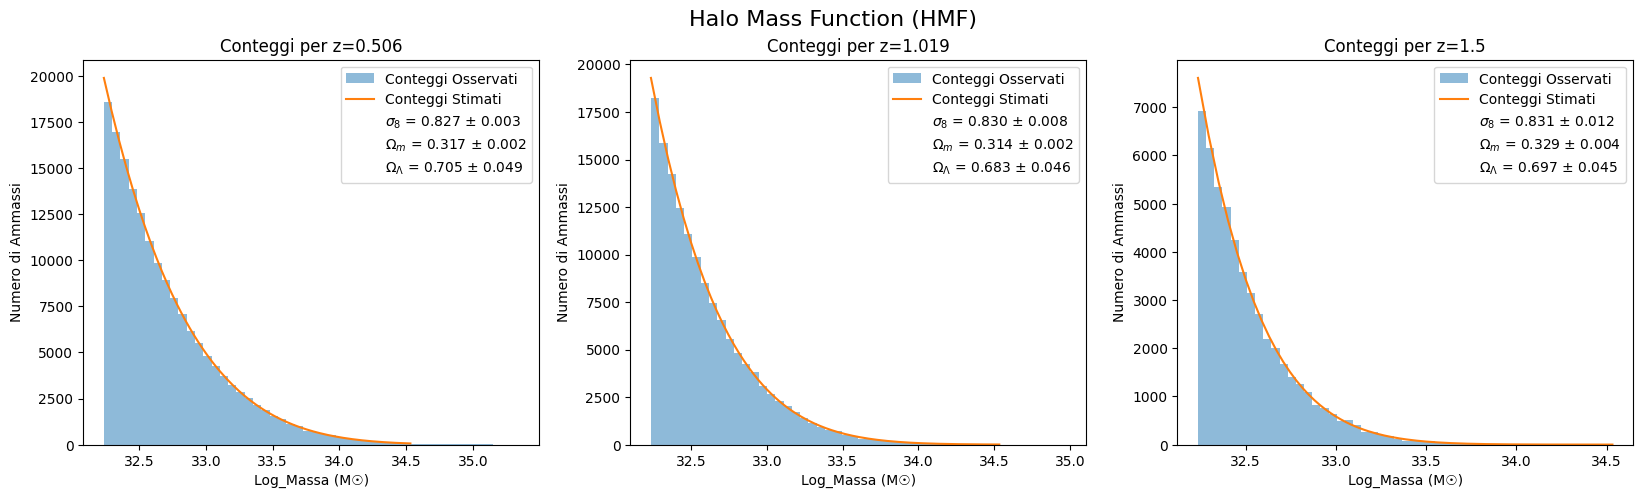

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

mass_bins = np.linspace(1e+14, 1e+15, 150)

i=0
for z in z_bins:
    params = {'flat': False, 'H0': 67.77, 'Om0': np.mean(dati[i][:,1]), 'Ode0': np.mean(dati[i][:,2]), 'Ob0': 0.049, 'sigma8': np.mean(dati[i][:,0]), 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')

    observed_counts, bins_edge = np.histogram(np.log(data[data['z'] == z]['mass']), bins=nbin)
    bins_edge = np.exp(bins_edge)
    bins_center = (bins_edge[:-1] + bins_edge[1:]) / 2
    volumes = data[data['z'] == z]['vol'].values[0]
    log_mass = (np.log(bins_center.max()) - np.log(bins_center.min())) / nbin 
    mfunc = mass_function.massFunction(mass_bins[:-1], z, mdef='vir', model='despali16', q_out='dndlnM') * volumes * log_mass
    
    axes[i].hist(np.log(data[data['z'] == z]['mass']), bins=nbin, alpha=0.5, label='Conteggi Osservati')
    axes[i].plot(np.log(mass_bins[:-1]), mfunc, label='Conteggi Stimati')
    axes[i].plot(np.log(mass_bins[0]), [0], color='none', label=f'$\sigma_{8}$ = {np.mean(dati[i][:,0]):.3f} $\pm$ {np.std(dati[i][:,0]):.3f}')
    axes[i].plot(np.log(mass_bins[0]), [0], color='none', label=f'$\Omega_m$ = {np.mean(dati[i][:,1]):.3f} $\pm$ {np.std(dati[i][:,1]):.3f}')
    axes[i].plot(np.log(mass_bins[0]), [0], color='none', label=f'$\Omega_\Lambda$ = {np.mean(dati[i][:,2]):.3f} $\pm$ {np.std(dati[i][:,2]):.3f}')
    axes[i].set_xlabel('Log_Massa (M☉)')
    axes[i].set_ylabel('Numero di Ammassi')
    axes[i].set_title(f'Conteggi per z={z}')
    axes[i].legend()
    
    i = i+1

fig.suptitle('Halo Mass Function (HMF)', fontsize=16)
plt.show()

Anche in questo caso, si osserva che il fit ottenuto con i parametri stimati si adatta bene ai valori osservati, suggerendo che, nel caso di un universo curvo, i parametri ottimizzati rappresentano la scelta più adeguata per descrivere i dati.

<font size="3"><b>Vincoli sulla densità di energia $\Omega_k$<b><font>

Come discusso in precedenza, dall'analisi delle distribuzioni congiunte si deduce che $\Omega_m$ e $\Omega_\Lambda$ non presentano una correlazione significativa tra loro. Di conseguenza, si può assumere che la distribuzione di $\Omega_k$, definita come  
<div style="text-align: center;">
$\Omega_k = 1 - \Omega_m - \Omega_\Lambda$
</div>

può essere ottenuta come la distribuzione risultante dalla convoluzione delle distribuzioni marginali di 
$\Omega_m$ e $\Omega_\Lambda$.

Nel caso in cui $\Omega_m$ e $\Omega_\Lambda$ siano distribuite secondo due gaussiane indipendenti, si avrà che anche $\Omega_k$ seguirà una distribuzione gaussiana con media $\mu_k = 1 - \mu_m - \mu_\Lambda$ e varianza $\sigma^2_k = \sigma^2_m + \sigma^2_\Lambda$.

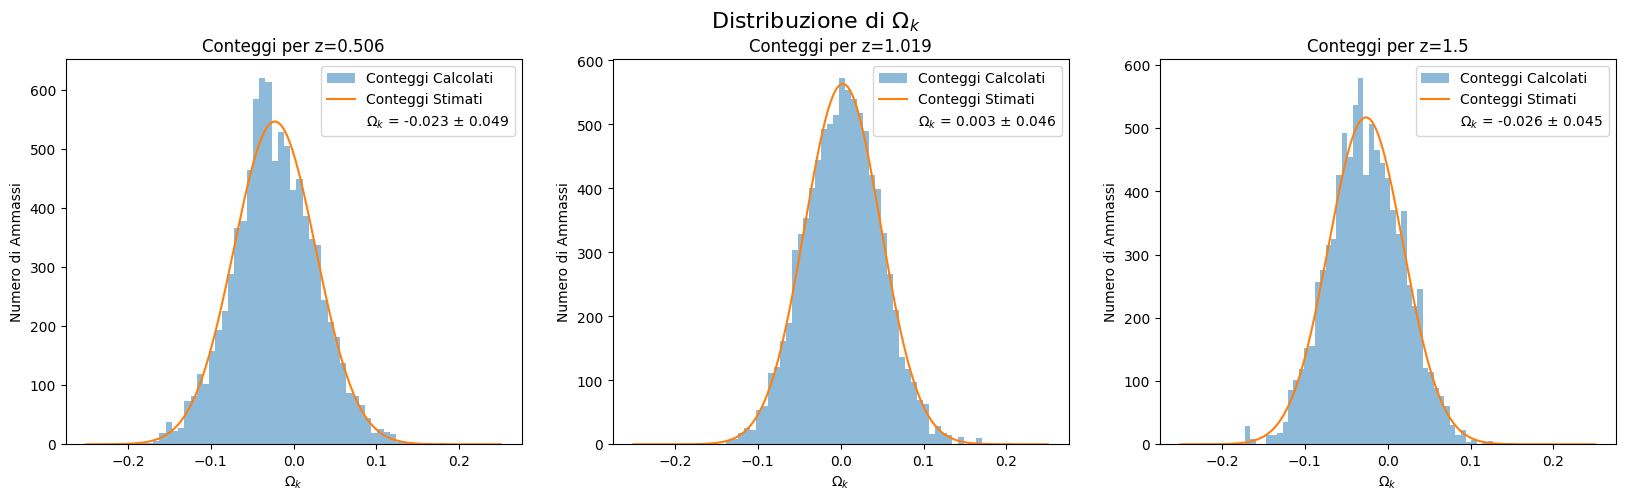

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

i=0
for z in z_bins:
    omega_k = 1 - dati[i][:,1] - dati[i][:,2]
    mu_k = 1 - np.mean(dati[i][:,1]) - np.mean(dati[i][:,2])
    sigma_k = np.var(dati[i][:,1]) + np.var(dati[i][:,2])

    xarr = np.linspace(-0.25, 0.25,150)
    
    observed_counts, bin_edges, _ = axes[i].hist(omega_k, nbin, alpha=0.5, label='Conteggi Calcolati')
    bin_width = np.diff(bin_edges)[0]
    axes[i].plot(xarr, stats.norm.pdf(xarr, loc=mu_k, scale=np.sqrt(sigma_k))*np.sum(observed_counts)*bin_width, label='Conteggi Stimati')
    axes[i].plot(xarr[0], [0], color='none', label=f'$\Omega_k$ = {mu_k:.3f} $\pm$ {np.sqrt(sigma_k):.3f}')
    axes[i].set_xlabel('$\Omega_k$')
    axes[i].set_ylabel('Numero di Ammassi')
    axes[i].set_title(f'Conteggi per z={z}')
    axes[i].legend()
    i=i+1

fig.suptitle('Distribuzione di $\Omega_k$', fontsize=16)
plt.show()

Possiamo quindi osservare che l'ipotesi formulata risulta coerente con i dati ottenuti, supportando la conclusione che $\Omega_k$ segua una distribuzione gaussiana con media  

<div style="text-align: center;">
$\mu_k = 1 - \mu_m - \mu_\Lambda$
</div>

e varianza  
<div style="text-align: center;">
$\sigma^2_k = \sigma^2_m + \sigma^2_\Lambda.$
</div>

Questo risultato conferma che la somma delle due variabili indipendenti $\Omega_m$ e $\Omega_\Lambda$, entrambe gaussiane, porta a una distribuzione gaussiana per $\Omega_k$, come atteso dalla teoria della propagazione degli errori nelle distribuzioni normali.  

<font size="5"><b>Conclusioni<b><font>

In conclusione, possiamo affermare che il modello teorizzato si adatta adeguatamente ai dati in nostro possesso, sia nel caso di universo piatto che nel caso di universo curvo. In entrambi i casi, il modello, attraverso l'inferenza bayesiana, consente di ricavare con precisione i parametri cosmologici necessari per lo studio dell'universo e dell'energia oscura. L'approccio adottato permette quindi di ottenere stime robuste e compatibili con le osservazioni, supportando l'affidabilità del modello teorico utilizzato.